<a href="https://colab.research.google.com/github/971933018/gait_cycle_project_shahidbeheshti_university/blob/main/smoothed_data_find_peaks_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy  
from scipy import signal  

In [4]:
!unzip "/content/drive/MyDrive/gait analysis/Data from phyphox"

Archive:  /content/drive/MyDrive/gait analysis/Data from phyphox
  inflating: Raw Data.csv            
  inflating: meta/device.csv         
  inflating: meta/time.csv           


In [80]:
data = pd.read_csv("/content/Raw Data.csv")


In [81]:
data.head(5)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.036831,-0.000481,0.043679,0.009212,0.044643
1,0.058598,-0.001316,0.061130,0.013115,0.062534
2,0.074417,-0.001919,0.101007,0.024014,0.103841
3,0.087505,0.001117,-0.047799,-0.010243,0.048897
4,0.099359,-0.026934,-0.004435,-0.330459,0.331585


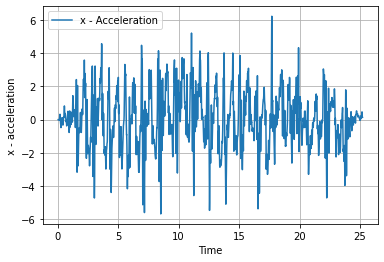

In [82]:
plt.plot(data['Time (s)'] , data['Linear Acceleration x (m/s^2)'] , label = "x - Acceleration" )
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.ylabel(" x - acceleration ")
plt.show()

In [83]:
data.shape

(2487, 5)

In [84]:
data = data.iloc[ 100 : -100 , : ]

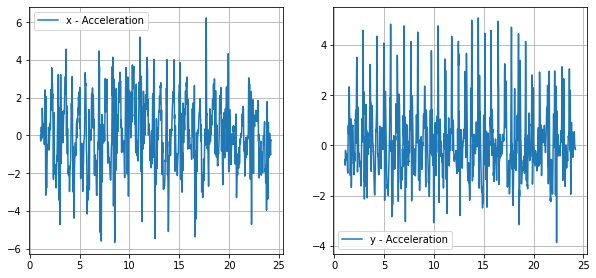

In [67]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.plot(data['Time (s)'] , data['Linear Acceleration x (m/s^2)'] , label = "x - Acceleration" )
ax2.plot(data['Time (s)'] , data['Linear Acceleration y (m/s^2)'] , label = "y - Acceleration" )
ax1.legend()
ax2.legend()
ax2.grid()
ax1.grid()
plt.show()

In [88]:
data.reset_index(inplace= True )

In [89]:
a , b = signal.butter(10 , 0.1 , btype='low', analog=False, output='ba', fs=None)
flit_acc_x = signal.filtfilt(a, b , data['Linear Acceleration x (m/s^2)'] )

In [90]:
a , b = signal.butter(10 , 0.1 , btype='low', analog=False, output='ba', fs=None)
flit_acc_y = signal.filtfilt(a, b , data['Linear Acceleration y (m/s^2)'] )

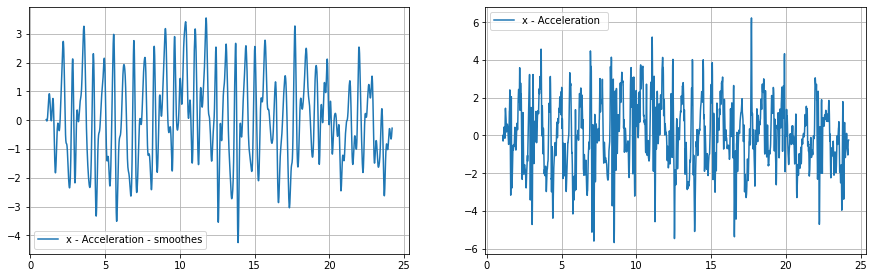

In [91]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.plot(data['Time (s)'] , flit_acc_x , label = "x - Acceleration - smoothes" )
ax2.plot(data['Time (s)'] , data['Linear Acceleration x (m/s^2)'] , label = "x - Acceleration " )
ax1.legend()
ax2.legend()
ax2.grid()
ax1.grid()
plt.show()

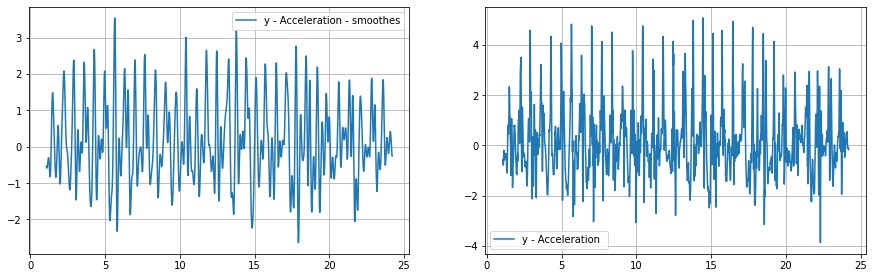

In [92]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.plot(data['Time (s)'] , flit_acc_y , label = "y - Acceleration - smoothes" )
ax2.plot(data['Time (s)'] , data['Linear Acceleration y (m/s^2)'] , label = "y - Acceleration " )
ax1.legend()
ax2.legend()
ax2.grid()
ax1.grid()
plt.show()

In [93]:
a , b = signal.butter(10 , 0.1 , btype='low', analog=False, output='ba', fs=None)
flit_acc_z = signal.filtfilt(a, b , data['Linear Acceleration z (m/s^2)'] )

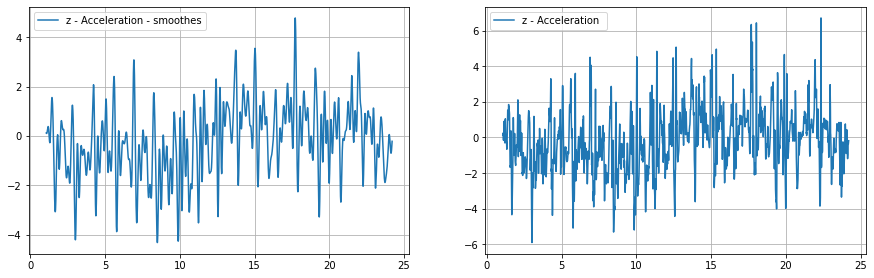

In [94]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax1.plot(data['Time (s)'] , flit_acc_z , label = "z - Acceleration - smoothes" )
ax2.plot(data['Time (s)'] , data['Linear Acceleration z (m/s^2)'] , label = "z - Acceleration " )
ax1.legend()
ax2.legend()
ax2.grid()
ax1.grid()
plt.show()

In [95]:
peaks_x , _  = signal.find_peaks(flit_acc_x )
peaks_y , _  = signal.find_peaks(flit_acc_y )
peaks_z , _  = signal.find_peaks(flit_acc_z )


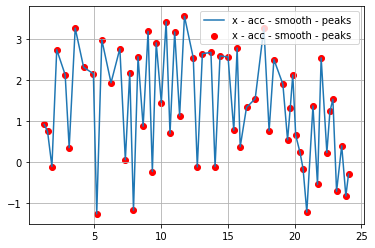

In [101]:
plt.scatter(data['Time (s)'][peaks_x] , flit_acc_x[peaks_x] , label = 'x - acc - smooth - peaks ' , color = 'red' )
plt.plot(data['Time (s)'][peaks_x] , flit_acc_x[peaks_x] , label = 'x - acc - smooth - peaks ' )
plt.legend()
plt.grid()
plt.show()

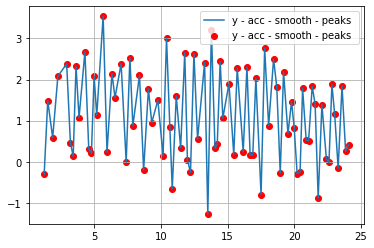

In [103]:
plt.scatter(data['Time (s)'][peaks_y] , flit_acc_y[peaks_y] , label = 'y - acc - smooth - peaks ' , color = 'red' )
plt.plot(data['Time (s)'][peaks_y] , flit_acc_y[peaks_y] , label = 'y - acc - smooth - peaks ' )
plt.legend()
plt.grid()
plt.show()

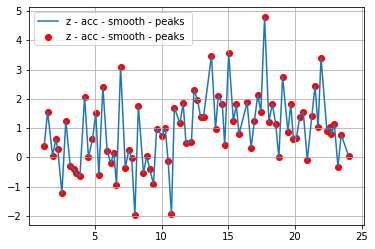

In [104]:
plt.scatter(data['Time (s)'][peaks_z] , flit_acc_z[peaks_z] , label = 'z - acc - smooth - peaks ' , color = 'red' )
plt.plot(data['Time (s)'][peaks_z] , flit_acc_z[peaks_z] , label = 'z - acc - smooth - peaks ' )
plt.legend()
plt.grid()
plt.show()